In [1]:
import numpy as np
from skimage import color, io, transform
import matplotlib.pyplot as plt

In [2]:
# Setting the parameters here
inputFile = 'MonaLisa1.jpg'
outputFile = 'pic.txt'
WIDTH = 120
CHARS = ['@' , '0' , 'o', ':' , ',' , '.' , ' '] # 'Darkest' to 'lightest' character

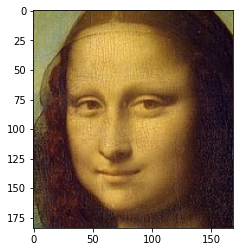

In [3]:
# Read the input image
img = io.imread(inputFile)
plt.imshow(img)

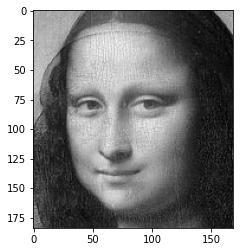

In [4]:
#Convert to grayscale and enhance contrast
img_gray = color.rgb2gray(img)
img_gray -= np.amin(img_gray)
img_gray /= np.amax(img_gray)
plt.imshow(img_gray,'gray')

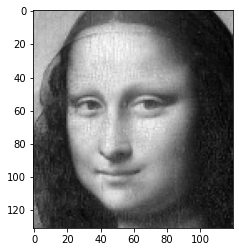

In [5]:
# Resize to WIDTH pixels wide. This is the max number of characters that will fit on a line
scale = WIDTH / img_gray.shape[1]
img_gray = transform.rescale(img_gray,scale)
plt.imshow(img_gray,'gray')

In [6]:
# Replace pixels by characters, based on grayscale value
line = ''
lines = []
for row in range(0,img_gray.shape[0],2): #Skip every other row. Why?
    for col in range(img_gray.shape[1]):
        val = img_gray[row,col]
        step = 1 / len(CHARS)
        line += CHARS[int(val / step)]
    print(line)
    lines.append(line)
    line = ''


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::oo0oooooooooooooo::oooooooooooooooooo0000000000000@0@@@@@@@@@@@0@@@@@@@@@@@@o::,:,,:,,,,
,,.,,,,,,,,,,,,,,,,,,,,,,,,,::o0oooooooooooooooo:::oooooooooooooo0o000000000000000000@@@@@@@@@@@@@@@@@@@@@@@@@,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,oo0oooo0oooooo:oooo:o:::oo:ooooooooooo0000000000000000000000@@0@@@@@@@@@@@@@@@@@@@@@0:,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,:oo00o0oooooooooooo::,:::::oooooooooooooo0000000000000000000@@@@@@@@@@@@@@@@@@00@@@@@@@@o:,,,,,
,,,,,,,,,,,,,,.,,,,,,,,,:o000oooooooooo::::,,,,,,,,,,,,,:::::::::oooo000000000000000@@@@@000@@@@@@@@@@@@@@@@@@@@@@@:,,:,
,,,,,,,,,,,,,,,,,,,,,,,:o0ooooooo:::,,,,,,.....,...,.,,,,,,,,,,,,,,:::oooo00000000000000@@0@@@@@@@@@@@@@@@@@@@@@@@@@o,,,
,.,,,,,,,,,,,,,,,,,,,,oooo0oo::,,,,,,....... ............,,,,,,,,,,,:,:oooo0o00000000000@00@@@@@@@@@@@@@@@@@@@@@@@@@@0:,
,.,,,,,,,,,,,,,,,,,,,:o000oo:::,,.,,,,,.,........ ..........,,,,,,,,,:::ooooooo0000000@00@0@@@@@@@@@@@@@@@@@@@@@@@@@@@@o
,,,....,.,.,,,,,,,,,oo000o:::::,

In [7]:
outfile = open(outputFile,'w')
for line in lines:
    outfile.write(line)
    outfile.write('\n')
outfile.close()